# Análise de Cluster em variáveis meteorológicas

Os dados foram baixados do site do INMET para a estação convencional da cidade de Porto de Pedras - AL

### Importando Bibliotecas necessárias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib .pyplot as plt
import numpy as np
from scipy.cluster import hierarchy

### Leitura dos dados

In [2]:
df = pd.read_csv('Porto_De_Pedra_AL.csv', sep=';')
df_data = df.dropna()
df_data = df_data.iloc[:,2:].astype(float)
df_data

,NEBULOSIDADE,PRECIPITACAO TOTAL,PRESSAO,TEMP DO AR BULBO SECO,TEMP DO AR BULBO UMIDO,TEMP DO PONTO DE ORVALHO,UMIDADE,VELOCIDADE DO VENTO
2463,10.0,0.0,1014.7,27.3,26.2,24.3,93.0,3.0
2544,8.0,2.8,1012.8,23.3,23.0,22.8,98.0,2.0
2545,10.0,19.9,1014.4,25.2,23.6,23.1,90.0,1.0
2547,9.0,0.5,1014.2,24.3,23.3,23.0,92.0,2.0
2548,8.0,0.0,1015.3,26.9,24.8,23.9,87.0,3.0
...,...,...,...,...,...,...,...,...
22548,5.0,3.0,1017.4,24.5,21.8,20.5,78.0,5.0
22549,3.0,0.0,1018.8,25.9,21.6,19.4,67.0,3.0
22551,10.0,3.0,1017.5,24.2,22.2,21.1,83.0,1.0
22552,8.0,2.8,1018.2,24.7,21.8,20.5,77.0,3.0


### Análise exploratória dos dados

#### Gráfico de dispersão

Nebulosidade: Como é uma medida em décimos feita por um observador, os gráficos ficam com uma parência peculiar, mas é possível ver que quanto maior a precipitação, mais temos o céu encoberto, já que em maior parte nessa região da costa do nordeste brasileiro a maior quantidade de chuva é causada pela nuvem nimbostratus que tem essa característica de cobrir a maior parte do ceú.

Precipitação total: Não tem uma relação bem definida com as outras variáveis, sendo que em grande parte dos dados da maioria das variáveis estão concentrados em zero.

Pressão ao nível do mar: Tem uma leve de correlação negativa com a temperatura, já que quanto maior a temperatura, o ar se expande e diminui a pressão.

Temperatura do Bulbo seco, Bulbo Úmido e do ponto de orvalho:  Apresentam correlações entre sí, já que estão ligadas pelo mesmo compotenente físico.

Umidade Relativa: Por ser uma cidade banhada pelo mar apresenta em sua maioria valores mais altos. Específicamente com a precipitação é possível ver a relação em que a precipitação tende a aumentar a umidade relativa do ar.

Velocidade do vento: Não há nenhuma relação significativa com as outras variáveis e apresenta alguns outliers bem expressívos.

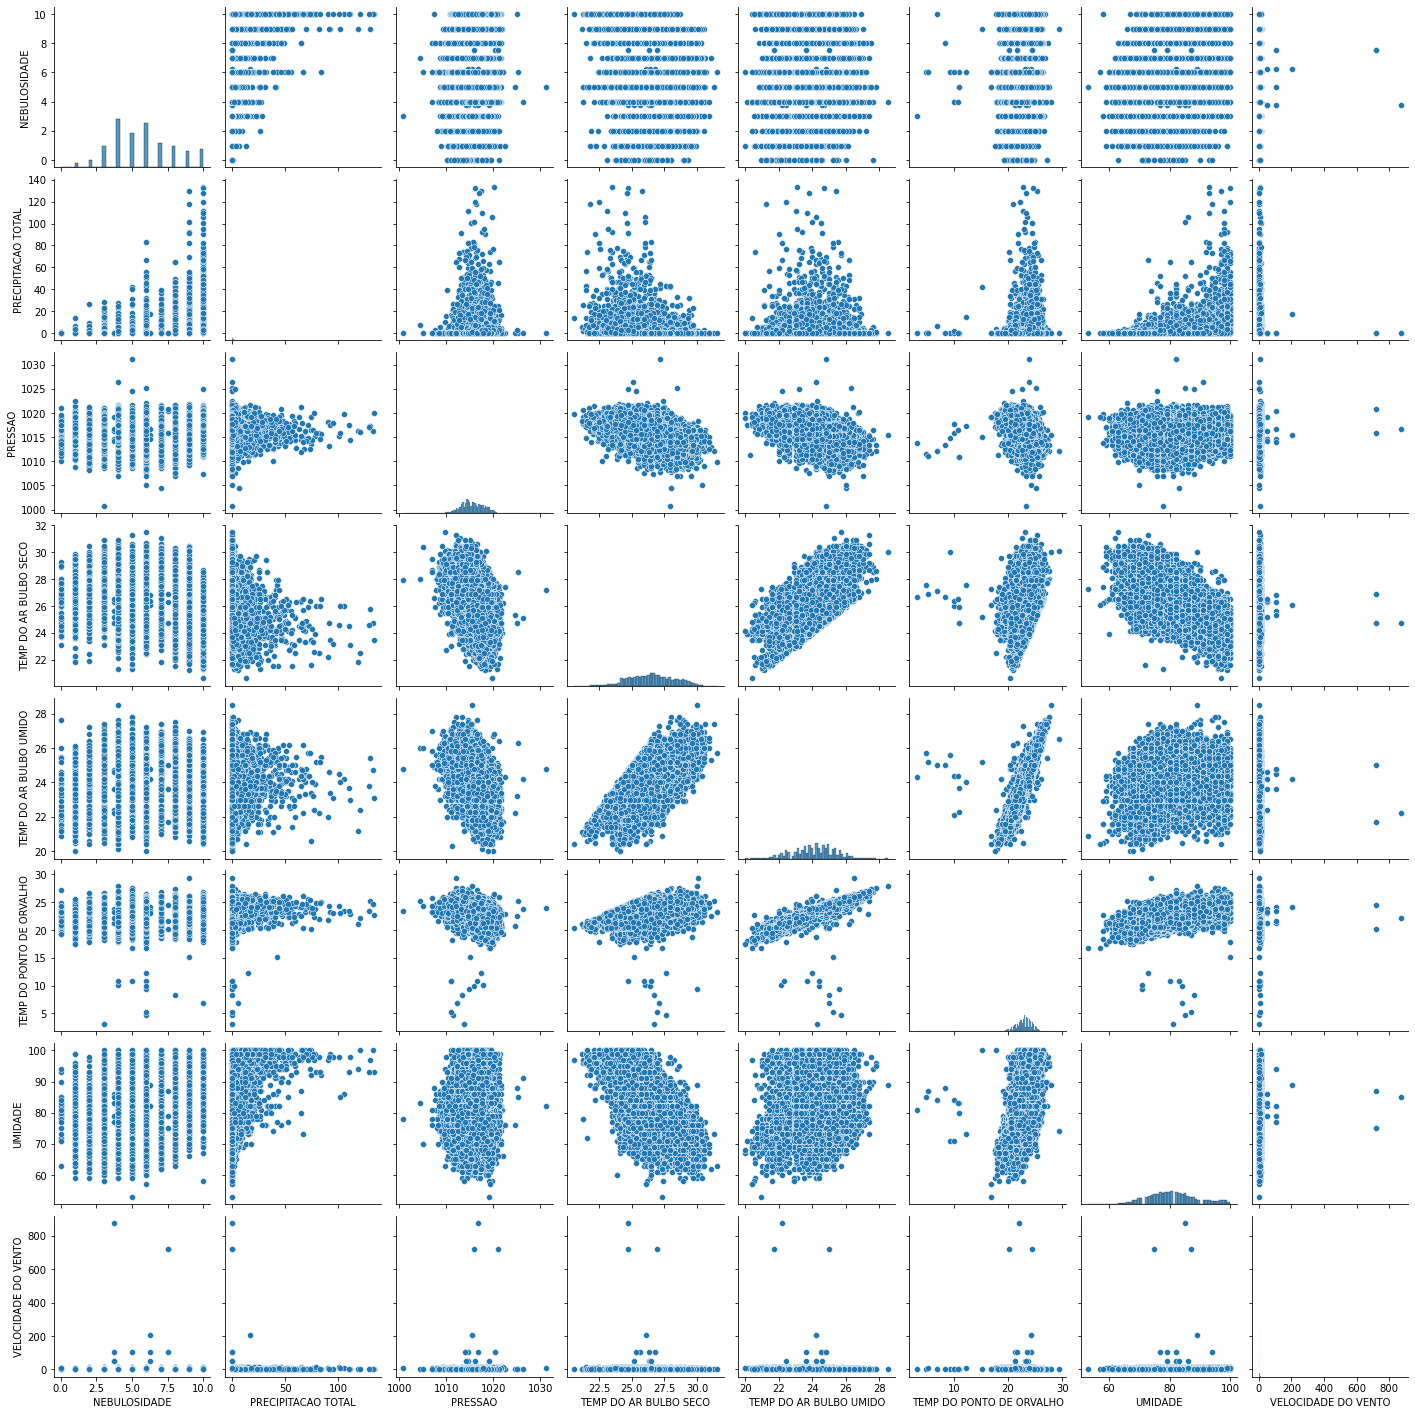

In [4]:
sns.pairplot(df_data)

#### Gráfico de Correlação

No gráfico de correlaçao podemos analisar melhor quantitativamente essas relação,  onde as correlações fortes estão entre as temperaturas. A pressão também possui uma correlação correlação moderada com as temperaturas. A Umidade também possuí correlação negativa moderada com a temperatura do bulbo seco e correlação positiva moderada com a temperatura do Orvalho.

<AxesSubplot:>

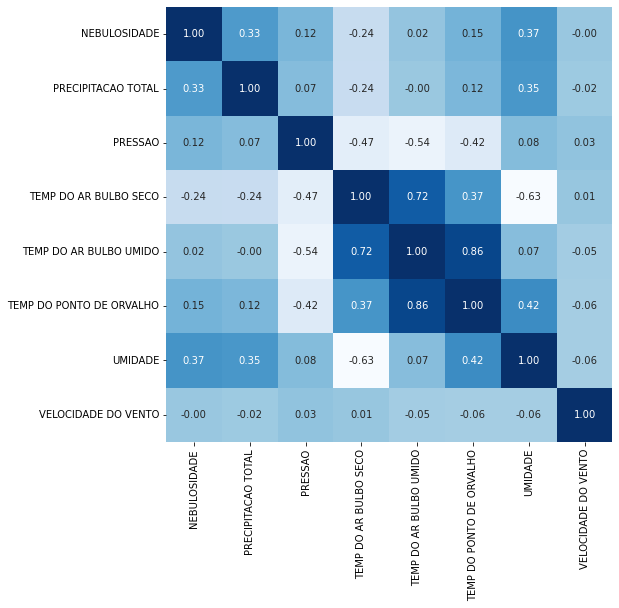

In [5]:
plt.figure(figsize=(8,8))
correlacao = np.corrcoef(df_data.values, rowvar=False)
sns.heatmap(correlacao, annot=True, cmap='Blues', fmt='.2f', cbar=False, xticklabels=df_data.columns, yticklabels=df_data.columns)



### Análise de Cluster

Analisando mais profundamente essas relações entre si, foi aplicado um modelo de análise de cluster hierárquico utilizando o metódo Ward.


No Dendrograma podemos analisar um grupo formado com as temperaturas, tendo essa similaridade entre sí pelo componetente físico comum entre elas que é o calor, mas que também tem relação com outro grupo formado entre a nebulosidade precipitação total e velocidade do vento. A umidade com uma relação mais fraca com esses dois grupos e a pressão que acabou não tendo uma relação bem definida dentro desses grupos.



(array([ 5, 15, 25, 35, 45, 55, 65, 75]),
 [Text(5, 0, 'PRESSAO'),
  Text(15, 0, 'UMIDADE'),
  Text(25, 0, 'TEMP DO AR BULBO SECO'),
  Text(35, 0, 'TEMP DO AR BULBO UMIDO'),
  Text(45, 0, 'TEMP DO PONTO DE ORVALHO'),
  Text(55, 0, 'VELOCIDADE DO VENTO'),
  Text(65, 0, 'NEBULOSIDADE'),
  Text(75, 0, 'PRECIPITACAO TOTAL')])

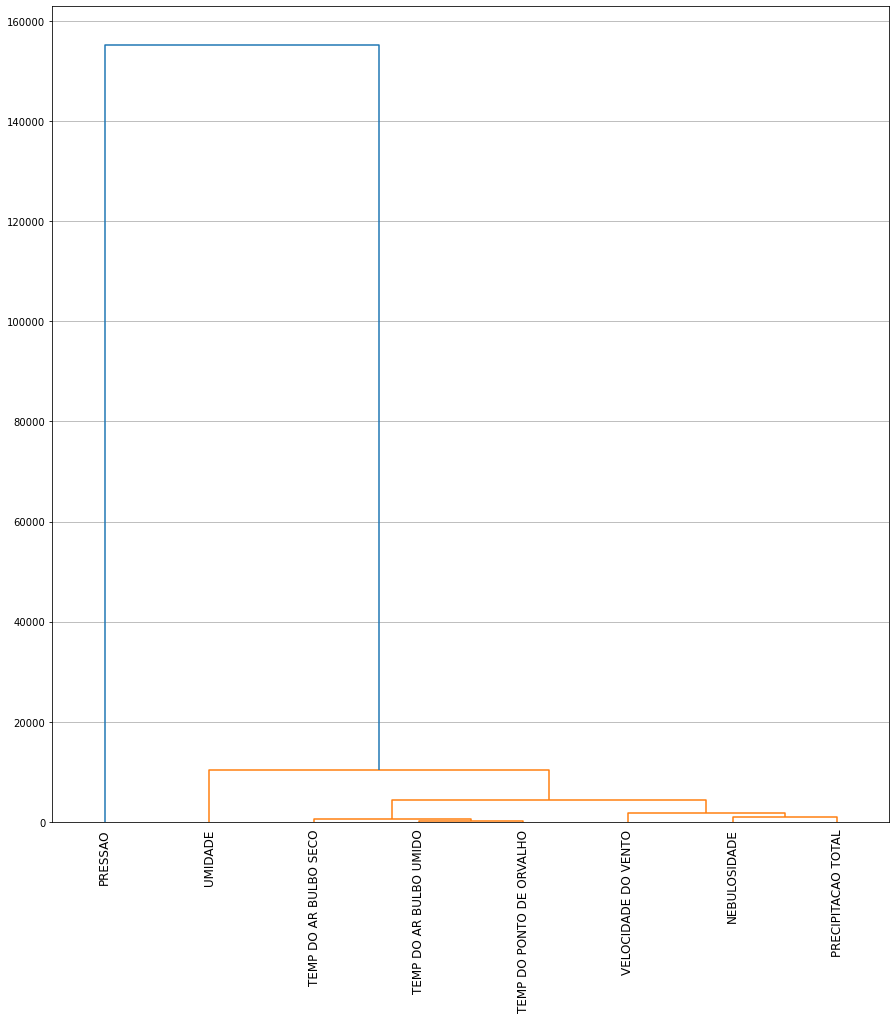

In [6]:
Z = hierarchy.linkage(df_data.T, method='ward')
plt.figure(figsize=(15,15))
plt.grid(axis='y')
dendrogram = hierarchy.dendrogram(Z, labels=list(df_data.T.index))
plt.xticks(rotation=90)